# Volume 4: Numerical Methods for IVPs
    Daniel Perkins
    MATH 437
    9/8/24

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

## Problem 1
Write a function which implements Euler's method. Test your function on the IVP:
$$\begin{align}
	\begin{split}
		x' (t)&= x(t) - 2t + 4,\quad 0 \leq t \leq 2, \\
		x(0) &= 0,
	\end{split}
\end{align}$$

where the analytic solution is $x(t) = -2+2t + 2e^t$.

Use the Euler method to numerically approximate the solution with step sizes $h = 0.2, 0.1$, and $0.05.$  Plot the true solution alongside the three approximations.

In [39]:
def euler(f, x0, t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the Euler method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    xi = x0
    approximation = [x0]
    h = (t[-1]-t[0])/(len(t)-1)  # Step size
    for ti in t[0:-1]:  # Skip first one since it is already included
        xi = xi + h*f(xi, ti)  # Euler's formilat
        approximation.append(xi)
    return np.array(approximation)
    

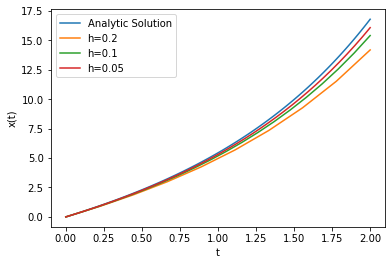

In [40]:
t = np.linspace(0,2,100)
x = -2 + 2*t + 2*np.exp(t)
def x_prime(x, t):  # Define the function
    return x - 2*t + 4
x0 = 0

plt.plot(t, x, label="Analytic Solution")
plt.plot(np.linspace(0,2,10), euler(x_prime, x0, np.linspace(0,2,10)), label="h=0.2")  # Step size is (2-0)/10=.2
plt.plot(np.linspace(0,2,20), euler(x_prime, x0, np.linspace(0,2,20)), label="h=0.1")
plt.plot(np.linspace(0,2,40), euler(x_prime, x0, np.linspace(0,2,40)), label="h=0.05")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend()
plt.show()

## Problem 2

Write functions that implement the midpoint and fourth-order Runge-Kutta methods. Then, consider again the IVP from Problem 1. Use the Euler, Midpoint, and RK4 methods to approximate the value of the solution for step sizes of $h = 0.2,$ $ 0.1,$ $0.05 $, $0.025,$ and $0.0125.$ Plot the true solution alongside the approximation obtained from each method when $h=0.2$. Then, use `plt.loglog` to create a log-log plot of the relative error $|x(2)-x_n|/{|x(2)|}$ as a function of $h$ for each approximation.

In [44]:
def midpoint(f, x0, t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the midpoint method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    xi = x0
    approximation = [x0]
    h = (t[-1] - t[0]) / (len(t) - 1)  # Step size
    for ti in t[0:-1]:  # Skip first one since it is already included
        # xi = xi + (h/2)*f(xi, ti)  # Euler's formula
        xi = xi + h*f(xi + (h/2)*f(xi, ti), ti+h/2)
        approximation.append(xi)
    return np.array(approximation)

def rk4(f, x0, t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using a fourth-order Runge-Kutta method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    xi = x0
    approximation = [x0]
    h = (t[-1] - t[0]) / (len(t) - 1)  # Step size
    for ti in t[0:-1]:  # Skip first one since it is already included
        K1 = f(xi, ti)
        K2 = f(xi + (h/2)*K1, ti + h/2)
        K3 = f(xi + (h/2)*K2, ti + h/2)
        K4 = f(xi + h*K3, ti + h)
        xi = xi + (h/6)*(K1 + 2*K2 + 2*K3 + K4)
        approximation.append(xi)
    return np.array(approximation)

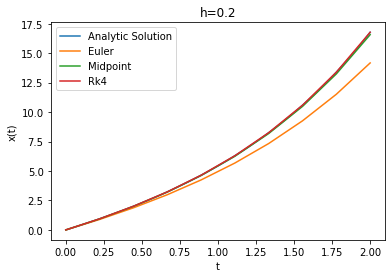

In [45]:
t = np.linspace(0,2,100)
x = -2 + 2*t + 2*np.exp(t)
def x_prime(x, t):  # Define the function
    return x - 2*t + 4
x0 = 0

plt.plot(t, x, label="Analytic Solution")
plt.plot(np.linspace(0,2,10), euler(x_prime, x0, np.linspace(0,2,10)), label="Euler")  # Step size is (2-0)/10=.2
plt.plot(np.linspace(0,2,10), midpoint(x_prime, x0, np.linspace(0,2,10)), label="Midpoint")  # Step size is (2-0)/10=.2
plt.plot(np.linspace(0,2,10), rk4(x_prime, x0, np.linspace(0,2,10)), label="Rk4")  # Step size is (2-0)/10=.2
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("h=0.2")
plt.legend()
plt.show()

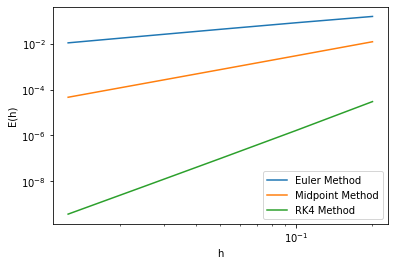

In [46]:
num_points = np.array([10, 20, 40, 80, 160])  # Used to get value of h
h = 2 / num_points
euler_errors = []
mid_errors = []
rk4_errors = []
for num_point in num_points: # Calculate the errors
    euler_errors.append(abs(x[-1] - euler(x_prime, x0, np.linspace(0,2,num_point))[-1])/abs(x[-1]))
    mid_errors.append(abs(x[-1] - midpoint(x_prime, x0, np.linspace(0,2,num_point))[-1])/abs(x[-1]))
    rk4_errors.append(abs(x[-1] - rk4(x_prime, x0, np.linspace(0,2,num_point))[-1])/abs(x[-1]))
    
plt.loglog(h, euler_errors, label="Euler Method")
plt.loglog(h, mid_errors, label="Midpoint Method")
plt.loglog(h, rk4_errors, label="RK4 Method")
plt.xlabel("h")
plt.ylabel("E(h)")
plt.legend()
plt.show()

## Problem 3

Use the RK4 method to solve for the simple harmonic oscillator satisfying:
$$\begin{align}
	\begin{split}
&{}my'' + ky = 0,\quad 0 \leq t \leq 20, \\
&{}y(0) = 2, \quad
y'(0) = -1,
	\end{split}
\end{align}$$

for $m = 1$ and $k = 1$. Compare this with the numerical approximation when $m = 3$ and $k =1$.

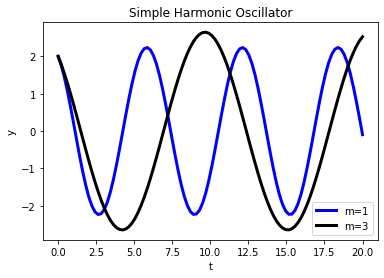

In [65]:
# Initial conditions
t = np.linspace(0,20,100)
x0 = [2, -1]

def x(m, k):   # Gives us freedom over m and k 
    def x_prime(x, t):  # Define the function
        return np.array([x[1], (-k/m)*x[0]])
    return x_prime

# Plot them
m = 1
k = 1
plt.plot(t, rk4(x(m, k), x0, t)[:,0], label="m=1", color="blue", linewidth=3)  #Cgange linewidth to match the diagram
m = 3
k = 1
plt.plot(t, rk4(x(m, k), x0, t)[:,0], label="m=3", color="black", linewidth=3) 
plt.xlabel("t")
plt.ylabel("y")
plt.title("Simple Harmonic Oscillator")
plt.legend()
plt.show()


## Problem 4

Use the RK4 method to solve for the damped free harmonic oscillator satisfying 
$$\begin{align*}
&{}y'' +\gamma y'+ y = 0, \quad 0 \leq t \leq 20,\\
&{}y(0) = 1, \quad
y'(0) = -1.
\end{align*}$$
For $\gamma = 1/2,$ and $\gamma = 1$, simultaneously plot your numerical approximations of $y$.

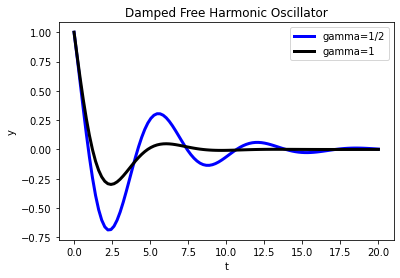

In [64]:
# Initial conditions
t = np.linspace(0,20,100)
x0 = [1, -1]

def x(gamma):   # Gives us freedom over gamma
    def x_prime(x, t):  # Define the function
        return np.array([x[1], -gamma*x[1] - x[0]])
    return x_prime

# Plot them
gamma = 1/2.
plt.plot(t, rk4(x(gamma), x0, t)[:,0], label="gamma=1/2", color="blue", linewidth=3)  #Cgange linewidth to match the diagram
gamma = 1.
plt.plot(t, rk4(x(gamma), x0, t)[:,0], label="gamma=1", color="black", linewidth=3) 
plt.xlabel("t")
plt.ylabel("y")
plt.title("Damped Free Harmonic Oscillator")
plt.legend()
plt.show()

## Problem 5

Use the RK4 method to solve for the damped and forced harmonic oscillator satisfying 

\begin{align*}
2y'' + \gamma y' + 2y &= 2 \cos (\omega t), \quad 0 \leq t \leq 40,\\
y(0) &= 2,\\
y'(0) &= -1
\end{align*}

For the following values of $\gamma$ and $\omega,$ plot your numerical approximations of $y(t)$: $(\gamma, \omega) = (0.5, 1.5),$ $(0.1, 1.1),$ and $(0, 1)$.

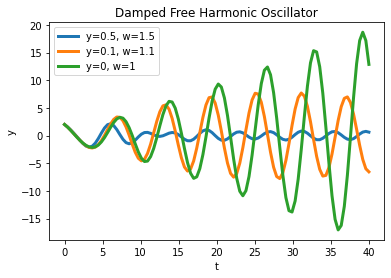

In [70]:
# Initial conditions
t = np.linspace(0,40,100)
x0 = [2, -1]

def x(gamma, w):   # Gives us freedom over gamma
    def x_prime(x, t):  # Define the function
        return np.array([x[1], np.cos(w*t) -(gamma/2.)*x[1] - x[0]])
    return x_prime

# Plot them
plt.plot(t, rk4(x(0.5,1.5), x0, t)[:,0], label="y=0.5, w=1.5", linewidth=3)  #Cgange linewidth to match the diagram
plt.plot(t, rk4(x(0.1,1.1), x0, t)[:,0], label="y=0.1, w=1.1", linewidth=3)  #Cgange linewidth to match the diagram
plt.plot(t, rk4(x(0,1), x0, t)[:,0], label="y=0, w=1", linewidth=3)  #Cgange linewidth to match the diagram
plt.xlabel("t")
plt.ylabel("y")
plt.title("Damped Free Harmonic Oscillator")
plt.legend()
plt.show()